# Hypothesis Testing and Z-Score

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

The stack_overflow.feather file contains a sample of the anual survey StackOverflow performs amongst its users. The converted_comp column contains the anual salary in USD of the user.

In [ ]:
stack = pd.read_feather('../data/stack_overflow.feather')
stack.head()

Lets hypothesize about the average salary of a data scientist and lets say its $110k.
We can calculate the mean of the sample (sample statistic) as our point estimate for the population statistic.

In [ ]:
stack.converted_comp.mean()

This mean is different from the one in our hypothesis, but is it meaningfully different?
To answer this question we need to generate a bootstrap distribution of the mean.

In [ ]:
bootstrap_means = []

for i in range(5000):
    bootstrap_means.append(stack.sample(frac=1, replace=True).converted_comp.mean())

sns.histplot(data=bootstrap_means, bins=50)


The histogram is bell shaped, so we can assume it follows a normal distribution.
1100 is on the left of the distribution.

Recall that the standard deviation of the sample statistics on the bootstrap distribution estimates the standard error of the estatistic.

Its time now to standardize values, to get rid of scales and units:

$$
standardizeValue = {{value-mean}\over standardDeviation}
$$

For hypothesis testing, we use the following variation:

$$
z = {{sampleStat-hypothesisParamValue}\over standardError}
$$

In [ ]:
z_score=(stack.converted_comp.mean() - 110000)/np.std(bootstrap_means, ddof=1)
z_score

The normal distribution with mean 0 and std 1 is often called the Z distribution.

In [ ]:
from scipy.stats import norm
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
sns.lineplot(x = x, y = norm.pdf(x, mu, sigma))
plt.show()

## p-values

A hypothesis is a statement about an unknown population parameter.
A hypothesis test is a test of two competing hypothesis.
These two hypothesis are:
- The null hypothesis (H<sub>0</sub>) representing the existing idea
- The alternative hypothesis (H<sub>A</sub>) representing the challenger idea of the researcher

Either one or the other is true, but not both.
Initially, H<sub>0</sub> is assumed to be true.
This only changes if the sample provides enough evidence to reject H<sub>0</sub>
The test ends in either *reject the H<sub>0</sub>* or *fail to reject H<sub>0</sub>*.
If the evidence from the sample is "significant" that H<sub>A</sub> is true, reject H<sub>0</sub>, else, choose H<sub>0</sub>

The significance level is the key to reject or fail to reject the null hypothesis.

Tests can be one tailed (right tailed or left tailed) or two tailed: 
- Alternative different from null -> two tailed
- Alternative greater than null -> right tailed
- Alternative less than null -> left tailed

For our example:
- H<sub>0</sub>: The proportion of data scientists starting programming as children is 35%
- H<sub>A</sub>: The proportion of data scientists starting programming as children is greater than 35%

This is an example of right tailed test.

P-values measures the strength of support of the null hypothesis. They measure the probability of obtaining a result, assuming the null hypothesis is true.

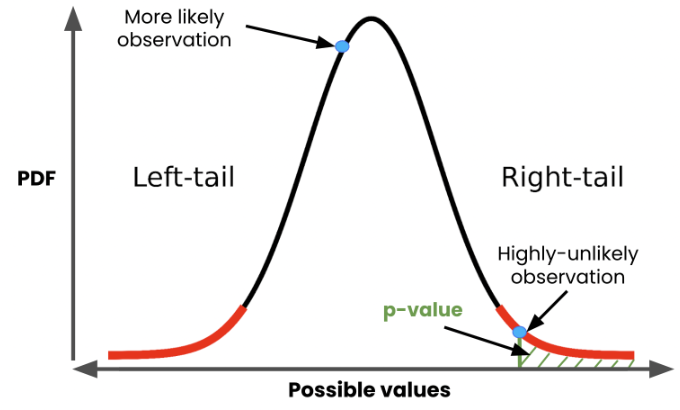

A large p-value, large support for H<sub>0</sub> means the statistic is likely not in the tail of the null distribution.
A small p-value, strong evidence against H<sub>0</sub>, means the statistic is likely in the tail of the null distribution.

P-values are probabilities, so they are always in [0, 1].

To calculate the p-value we need first to calculate the z-score.

In [ ]:
prop_child_samp = (stack.age_first_code_cut == 'child').mean()
prop_child_samp

In [ ]:
first_code_boot = []

for i in range(5000):
    first_code_boot.append((stack.sample(frac=1, replace=True).age_first_code_cut == 'child').mean())

sns.histplot(data=first_code_boot, bins=50)


z = (prop_child_samp - 0.35)/np.std(first_code_boot, ddof=1)

In [ ]:
np.std(first_code_boot, ddof=1)

In [ ]:
z

We pass the z-score to the cdf

In [ ]:
from scipy.stats import norm

In [ ]:
# (1 -)  since its a right tailed test
1 - norm.cdf(z, loc=0, scale=1)

## Statistical significance

p-values are used to reject or fail to reject the null hypothesis depending on its value. There is a cutoff point, known as significance level ($\alpha$), that represents the threshold for 'beyond a reasonable doubt'.

Common values for this significance level are 0.2, 0.1, 0.05 and 0.01. 

If p<= $\alpha$ reject H<sub>0</sub>, else, fail to reject H<sub>0</sub>

The significance level should be set prior to conducting the hypothesis test.



In [ ]:
# 1. Set the confidence level
alpha=0.05

# 2. Calculate the z value
prop_child_samp = (stack.age_first_code_cut=='child').mean()
prop_child_hyp = 0.35
std_error = np.std(first_code_boot, ddof=1)

z = (prop_child_samp-prop_child_hyp)/std_error

# 3. Calculate the p-value
p = 1 - norm.cdf(z, loc=0, scale=1)

In [ ]:
if (p<=alpha):
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

We have strong evidence for the alternative hypothesis

## Confidence intervals

For a significance level of $\alpha$ its common to choose a confidence interval level of 1-$\alpha$

In [ ]:
lower=np.quantile(first_code_boot, 0.025)
upper=np.quantile(first_code_boot, 0.975)
print(f'[{lower}, {upper}]')

## Types of errors

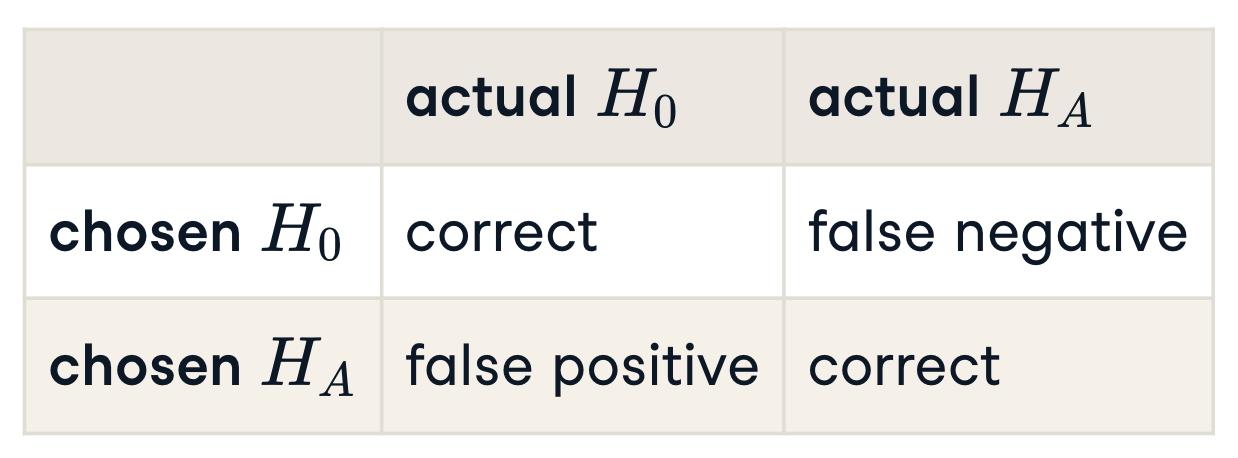

False positives are Type 1 errors
False negatives are Type 2 errors
